# Factor Heatmap based on raw data

First import all libraries:

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read files

In [217]:
raw_data_df = pd.read_csv('./data/GSE183534_FactorAnalysis-DGEList.gct', sep='\t', header=2)

feature_data_df = pd.read_csv('./data/2022-02-18-TeraTox-commercial-featureData.txt', sep='\t', header=0)

Filter genes by attribute `is gene card`

In [447]:
def filter_data(raw_data_df, feature_data_df):
    filtered_data_rows = []
    only_gene_card = list(feature_data_df.loc[feature_data_df['IsGeneCard'] == False]['GeneSymbol'].tolist())
    for gene in only_gene_card:
        filtered_data_df = raw_data_df.loc[raw_data_df['Description'] == gene]
        if len(filtered_data_df.index):
            filtered_data_rows.append(list(filtered_data_df.iloc[0]))
    filtered_data = pd.DataFrame(filtered_data_rows, columns=raw_data_df.columns)
    return filtered_data

filtered_data = filter_data(raw_data_df, feature_data_df)

filtered_data

,NAME,Description,M1_1_DMSO_ctrl,M1_2_DMSO_ctrl,M1_3_DMSO_ctrl,M1_4_DMSO_ctrl,M1_5_DMSO_ctrl,M1_6_DMSO_ctrl,M1_7_DMSO_ctrl,M1_8_DMSO_ctrl,...,hEST_N_18_534_hEST_N_18.Misoprostol.3,hEST_N_18_522_hEST_N_18.Misoprostol.4,hEST_N_18_510_hEST_N_18.Misoprostol.5,hEST_N_18_498_hEST_N_18.Misoprostol.6,hEST_N_18_553_hEST_N_18.Warfarin.1,hEST_N_18_541_hEST_N_18.Warfarin.2,hEST_N_18_529_hEST_N_18.Warfarin.3,hEST_N_18_517_hEST_N_18.Warfarin.4,hEST_N_18_505_hEST_N_18.Warfarin.5,hEST_N_18_493_hEST_N_18.Warfarin.6
0,NM_176825,SULT1C2,7,5,8,4,17,8,11,29,...,36,38,91,80,34,111,54,125,42,42
1,NM_000104,CYP1B1,4645,7733,5792,6828,6431,6428,4994,7898,...,3673,5307,3273,1995,8284,3350,6077,3011,4535,6309
2,NM_000965,RARB,501,258,435,353,689,473,415,759,...,335,291,222,139,178,225,448,240,233,335
3,NM_016381,TREX1,56,77,79,98,87,107,90,182,...,144,163,149,130,317,171,157,126,185,202
4,NM_001548,IFIT1,20,12,20,25,32,16,14,46,...,25,22,14,24,27,18,16,19,16,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,NM_001130991,HYOU1,13030,12869,14114,16880,19472,19430,15326,30769,...,14776,21804,17749,15624,25179,18829,22913,15202,16952,22771
1136,NM_000334,SCN4A,132,77,210,106,311,162,172,413,...,506,632,593,612,747,715,695,581,619,772
1137,NM_004820,CYP7B1,227,117,255,224,424,363,419,785,...,77,110,218,192,104,245,225,210,173,164
1138,NM_000852,GSTP1,39977,67087,39573,57410,44903,53114,36078,70252,...,35349,43494,31843,31340,67682,36918,51277,27082,32522,49342


Create clustered heatmap

In [448]:
filtered_data.drop('NAME', axis=1, inplace=True)

filtered_data.set_index('Description', inplace=True, drop=True)

In [449]:
count_columns = filtered_data.columns[0:]


sample_sums = filtered_data[count_columns].sum()

cpm_factor = 1e6 / sample_sums

normalized_df = filtered_data.copy()
normalized_df[count_columns] *= cpm_factor

filtered_data = normalized_df

C:\Users\paulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\paulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


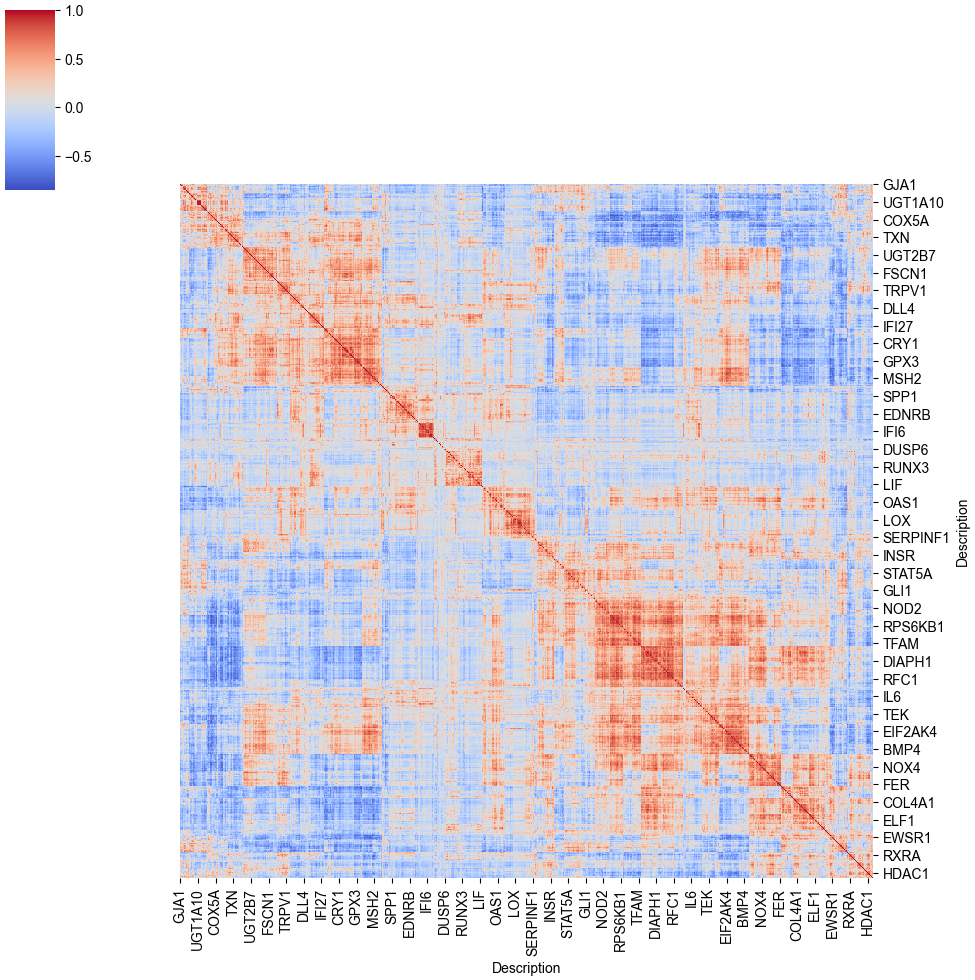

In [453]:
# Correlation heatmap for genes
corr = filtered_data.T.corr() #method='spearman'

# Correlation heatmap for drugs and each dose 
#corr = filtered_data.corr()

import seaborn as sns

cg = sns.clustermap(corr, cmap='coolwarm')

cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

Do factor analysis

In [454]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(corr)

fa = FactorAnalyzer(n_factors=10,rotation=None, is_corr_matrix=True)

fa.fit(corr)

factor_analysis_result = fa.loadings_

factor_analysis_result

C:\Users\paulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


array([[ 0.26474503, -0.05761084,  0.41951103, ...,  0.14256598,
        -0.1752149 ,  0.10282229],
       [-0.3349858 ,  0.51669404,  0.0413827 , ..., -0.14387419,
         0.18628395,  0.2428287 ],
       [-0.06301566,  0.18640655,  0.426928  , ..., -0.13824615,
         0.09254457, -0.08156582],
       ...,
       [ 0.47773856,  0.52990531,  0.38021274, ...,  0.1012855 ,
         0.08964663, -0.08672104],
       [-0.50771065,  0.308586  ,  0.33824895, ...,  0.06268744,
         0.03484322, -0.07037258],
       [ 0.63839356, -0.17300249, -0.26911978, ..., -0.24455891,
         0.04391808, -0.01642955]])

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


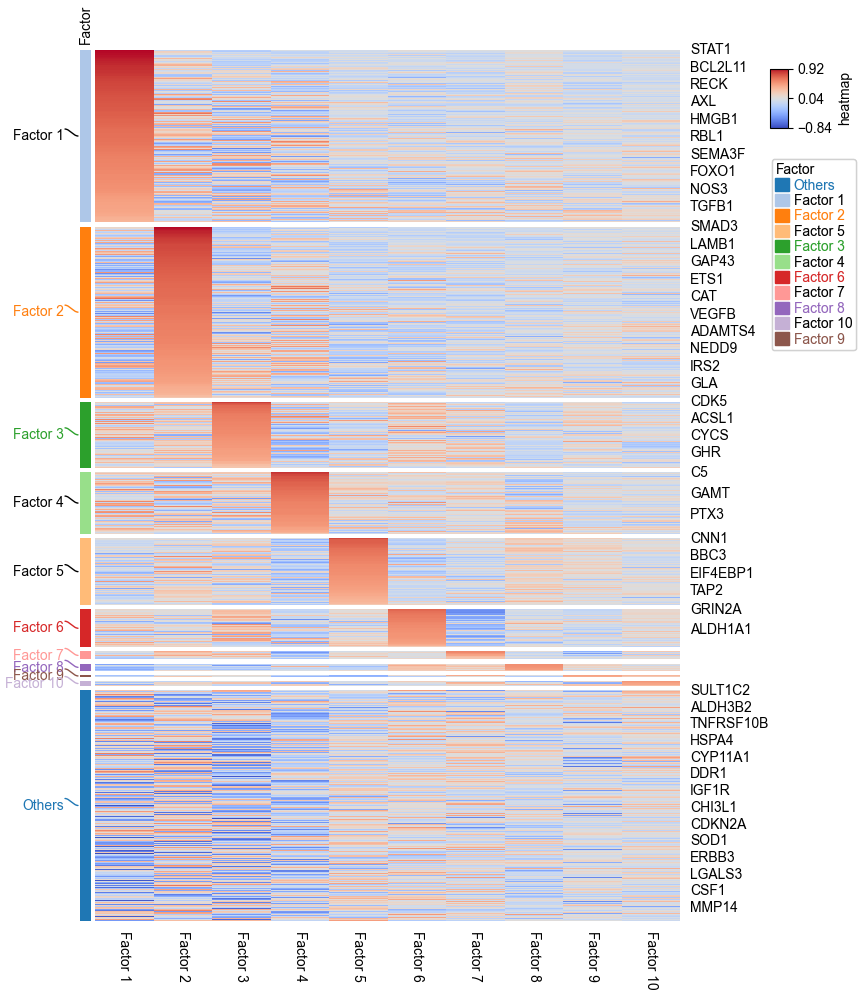

In [455]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['font.family']='sans serif' #please remove this line if font is not installed
plt.rcParams['font.sans-serif']='Arial' # please remove this line if Arial font is not installed
plt.rcParams['pdf.fonttype']=42
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap as chm

factor_name_list = ['Factor ' + str(i) for i in range(1,len(factor_analysis_result[0])+1)]

factor_analysis_result_df = pd.DataFrame(factor_analysis_result, index=corr.index, columns=factor_name_list)

factor_data_list = [pd.DataFrame(columns=factor_name_list+['factor_index']) for i in range(len(factor_analysis_result[0])+1)]

#sns.clustermap(factor_analysis_result_df, cmap='coolwarm')
sorted_df = pd.DataFrame(columns=factor_name_list+['factor_index'])

for index, row in factor_analysis_result_df.iterrows():
    items = list(row.to_list())
    max_value = np.max(items)
    min_value = np.min(items)
    if abs(max_value) > abs(min_value):
        item_index = items.index(max_value)
        items.append('Factor ' + str(item_index+1))
        factor_data_list[item_index].loc[index] = items
    else:
        items.append('Others')
        factor_data_list[-1].loc[index] = items


for idx, x in enumerate(factor_data_list):
    if idx == len(factor_analysis_result[0]):
        break
    x.sort_values('Factor '+ str(idx+1), inplace=True, ascending=False)

sorted_df = pd.concat(factor_data_list, ignore_index=False)

row_ha = chm.HeatmapAnnotation(
    labels=chm.anno_label(sorted_df['factor_index'],legend=False, merge=True),
                           Factor=chm.anno_simple(sorted_df['factor_index'],legend=True, add_text=False),
                           verbose=0,axis=0,plot_legend=True, linewidths=0.05,legend_gap=6,
                           legend_hpad=25, orientation='left') #label_kws={'rotation':90,'rotation_mode':'anchor','color':'black'}

sorted_df_2 = sorted_df.drop('factor_index', axis=1)

plt.figure(figsize=(8, 10))

cm = chm.ClusterMapPlotter(data=sorted_df_2,row_cluster=False,col_cluster=False, cmap='coolwarm', left_annotation=row_ha, show_rownames=True,show_colnames=True, row_split=sorted_df.factor_index, row_split_gap=1, row_split_order=sorted_df.factor_index)
plt.show()


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


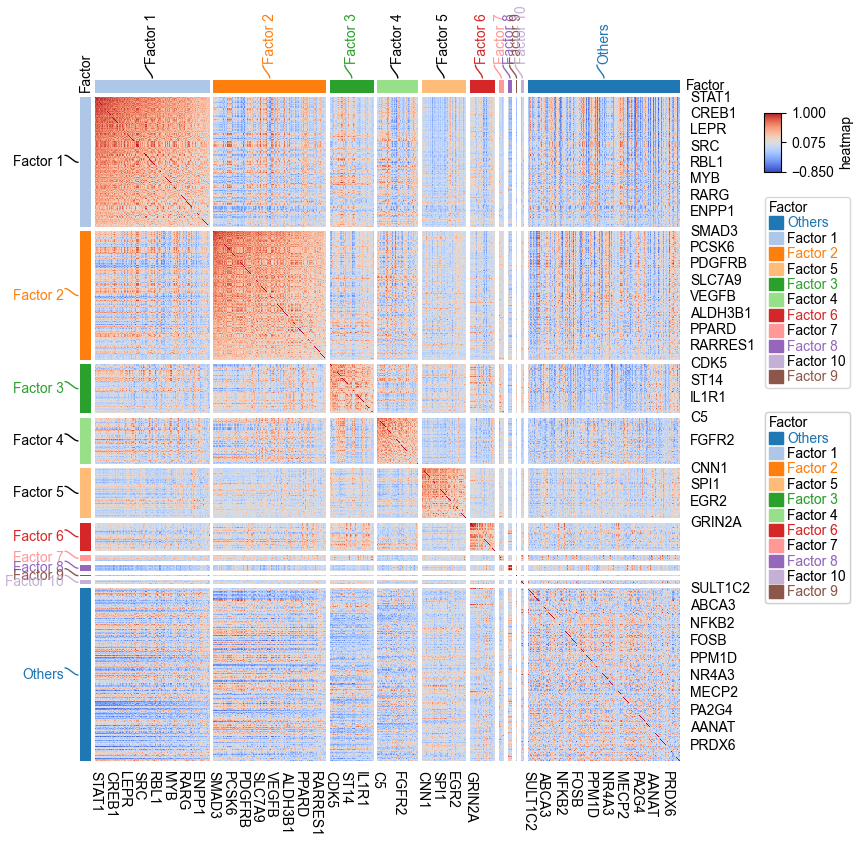

In [456]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family']='sans serif' #please remove this line if font is not installed
plt.rcParams['font.sans-serif']='Arial' # please remove this line if Arial font is not installed
plt.rcParams['pdf.fonttype']=42
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap as chm

plt.figure(figsize=(8, 8))

row_ha = chm.HeatmapAnnotation(
    labels=chm.anno_label(sorted_df['factor_index'],legend=False, merge=True),
    Factor=chm.anno_simple(sorted_df['factor_index'],legend=True, add_text=False),
    verbose=0,axis=0,plot_legend=True, linewidths=0.05,legend_gap=6,
    legend_hpad=25, orientation='left')

col_ha = chm.HeatmapAnnotation(
    labels=chm.anno_label(sorted_df['factor_index'],legend=False, merge=True, rotation=90),
    Factor=chm.anno_simple(sorted_df['factor_index'],legend=True, add_text=False),
    verbose=0,axis=1,plot_legend=True, linewidths=0.05,add_text=True,legend=True)

cm = chm.ClusterMapPlotter(data=corr,row_cluster=False,col_cluster=False, cmap='coolwarm', show_rownames=True,show_colnames=True, top_annotation=col_ha, row_split=sorted_df.factor_index, row_split_gap=1, row_split_order=sorted_df.factor_index, left_annotation=row_ha, col_split=sorted_df.factor_index, col_split_gap=1, col_split_order=sorted_df.factor_index)
plt.show()